<a href="https://colab.research.google.com/github/CookiesAndWater/MAT_422/blob/main/MAT_422_3%2C5_3%2C6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.5 K-means

* **K-means clustering**: K-means clustering is a method of vector quantization that partitions $n$ observations into $k$ clusters, trying to minimize within-cluster varience (grouping observations that are relatively close to each other).
  * Given observations $x$, we want to partition n observations into $k(< n)$ sets $S_i$, to minimize the within-cluster sum of squares (WCSS)
    * $WCSS_i = ∑_{x \in S_i} ||x- μ(S_i)||^2$, where $μ(S_i)$ is the mean of points in $S_i$

    * $μ(S) = \frac{1}{|S|}∑_{x \in S}x$.
    
    * The final objective is $arg$ $min_s ∑^k_{i=1}WCSS_i$
* **K-means Clustering Algorithm**:
  * 1. Cluster the data into predefined $k$ groups
  * 2. Select $k$ points at random as cluster centers
  * 3. Assign objects to their closest cluster center according to the Euclidean distance function
  * 4. Calculate the centroid(mean of all objects in each cluster)
  * 5. repeat steps 2, 3, and 4 until all the points are assigned to each cluster
* **Elbow Method**: A graphical method for finding the optimal $k$ value.
  * To identify the **elbow** on graph, look at the point in which the graph becomes linear(or at least close to linear).

Data:  [(3, 22), (5, 24), (1, 17), (6, 25), (2, 20), (11, 25), (5, 21), (4, 25), (10, 24), (3, 19)]


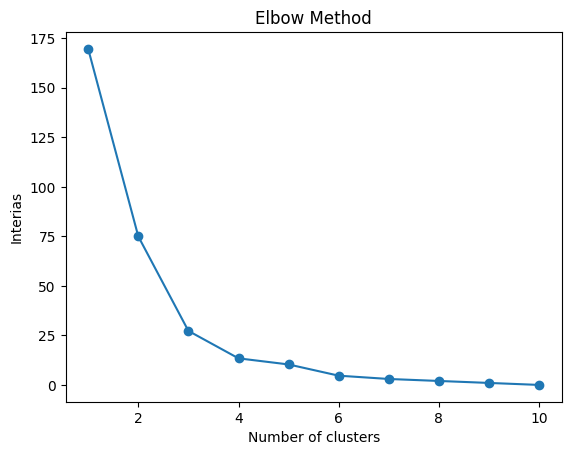

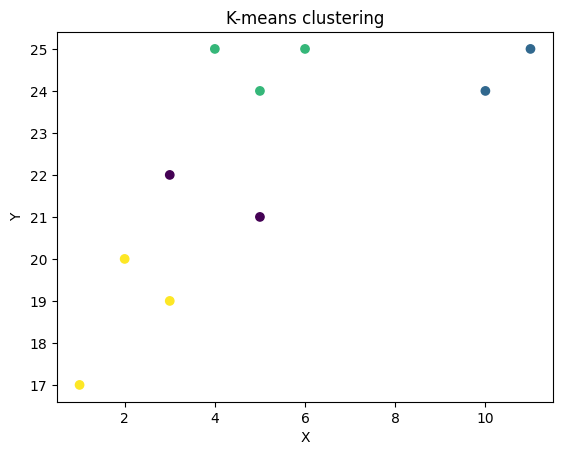

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np



#Data
x = [3,5,1,6,2,11,5,4,10,3]
y = [22,24,17,25,20,25,21,25,24,19]

data = list(zip(x,y))
print("Data: ", data)

#The distance between the data points and data squared
interias = []

#Finding the optimal number of cluster, by checking the intertia
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    interias.append(kmeans.inertia_)

plt.plot(range(1,11),interias, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Interias')
plt.show()

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
plt.scatter(x,y,c=kmeans.labels_)
plt.title('K-means clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Above is an implementation of K-means clustering using sklearn. Given some data we first figure out the optimal k-value. We can do this finding the interia of the data points and graphing it. On the graph, at the point where it seems change into a linear line, is called the "elbow", which is the optimal number of k-clusters. From there, we use sklearn KMeans to color the points on the groups to determine which points belong to which cluster.

# 3.6 Support Vector Machine

* **Support-Vector Machines**: Support-vector machines (SVM) are supervised learning models, which analyze data for classification and regression analysis. Given a set of training examples in two categories, SVM assigns new data to one of the two categories.
  * It works by maximizing the distance between the two categories in high dimensional space. New data is classified based on whichever they are closer to.

* Given a training set of $n$ points in the form $(x_1,y_1),...,(x_n,y_n)$, where $y_i$ is only 1 or -1, we want to maximize the margin distance of the hyperplanes(what separates the categories).
  * A hyperplane can be written as the set of points $x$ satisfying
    * $w^Tx-b=0$, where $w$ is the normal vector.
  * The region bounded by these points is called the **margin**, and the maximum-margin hyperplane is the plane is in between these two (the maximum-margin hyperplane is define above.)
    * The margin is defined by these equations:
    * $w^Tx-b=-1$
    * $w^Tx-b=1$
  * We want the data points to fall into the margins, so they have to satisfy the following equations
    * $w^Tx_i - b ≥ 1$, if $y_1 = 1$
    * $w^Tx_i - b ≤ -1$, if $y_1 = -1$
    * Combining the two equations above gives: $y_i(w^Tx_i-b) ≥ 1$, for all $1 ≤ i ≤ n$
* Putting everything together, we get the optimization problem that we need to solve for SVM:
  * $min_{w,b} ⟨ λ||w||^2 + \frac{1}{n} Σ^n_{i=1}max\{0,1-y_i(⟨w,x_i⟩-b)\}$
    * The term, $λ||w||^2$, is the regularization term, which comes from the margin
    * The other term, $\frac{1}{n} Σ^n_{i=1}max\{0,1-y_i(⟨w,x_i⟩-b)\}$, is the error term

In [7]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Get the data
cancer = load_breast_cancer()

print("Features: ", cancer.feature_names)
print("\nCategories: ",cancer.target_names)

#Split data into training and tests
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25, random_state=1)
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print("\nAccuracy: ", accuracy_score(y_test, y_pred))

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Categories:  ['malignant' 'benign']

Accuracy:  0.9370629370629371


The code above uses data from breast cancers. It has a lot of features, which can be put into two categories, malignant or benign. We split the data into training data and test data, to test how accurate out model is. We use sklearn's svm library to create a model using half of the data, then we test the model's accuracy with the the other half of the data.